# The Evolution of Cinema: IMDb Movie Analysis from 2000 to 2020

This project analyzes IMDb-listed movies released between 2000 and 2020 to uncover key trends, patterns, and insights within the film industry over two decades. By examining attributes such as genre, duration, language, actors, directors, IMDb ratings, and votes, this analysis seeks to reveal popular genres, shifts in movie durations, audience engagement patterns, and the rise of different languages and genres. Through data exploration and visualization, we aim to understand how the film landscape has evolved and what factors contribute to high ratings and audience interest. This project will provide valuable insights into the changing dynamics of the movie industry and viewer preferences over time.

In [3]:
#Importing important libraries which we will use in this project.
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
#Import the Data
data = pd.read_csv('IMDB Movies 2000 - 2020.csv')


In [5]:
data.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language_1,language_2,...,actors_1,actors_f2,description,desc35,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,reviews_from_users
0,tt0035423,Kate & Leopold,Kate & Leopold,2001,01/03/2002,"Comedy, Fantasy, Romance",118,USA,English,French,...,Meg Ryan,"Meg Ryan, Hugh Jackman",An English Duke from 1876 is inadvertedly drag...,An English Duke from 1876 is inadvertedly,6.4,77852,48000000,47121859.0,76019048,341.0
1,tt0118589,Glitter,Glitter,2001,30/11/2001,"Drama, Music, Romance",104,USA,English,NaN,...,Mariah Carey,"Mariah Carey, Max Beesley",A young singer dates a disc jockey who helps h...,A young singer dates a disc jockey,2.2,21298,22000000,4274407.0,5271666,319.0
2,tt0118694,In the Mood for Love,Fa yeung nin wah,2000,27/10/2000,"Drama, Romance",98,"Hong Kong, China",Cantonese,Shanghainese,...,Maggie Cheung,"Maggie Cheung, Tony Chiu-Wai Leung","Two neighbors, a woman and a man, form a stron...","Two neighbors, a woman and a man,",8.1,119171,NaN,2738980.0,12854953,422.0
3,tt0120202,"Hollywood, Vermont",State and Main,2000,31/05/2002,"Comedy, Drama",105,"France, USA",English,Italian,...,Michael Higgins,"Michael Higgins, Michael Bradshaw",A movie crew invades a small town whose reside...,A movie crew invades a small town,6.7,20220,NaN,6944471.0,9206279,175.0
4,tt0120263,Canzoni del secondo piano,Sånger från andra våningen,2000,06/10/2000,"Comedy, Drama",98,"Sweden, Norway, Denmark",Swedish,Russian,...,Lars Nordh,"Lars Nordh, Stefan Larsson",Where are we humans going? A film poem inspire...,Where are we humans going? A film,7.6,17188,NaN,80334.0,80334,110.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5487 entries, 0 to 5486
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          5487 non-null   object 
 1   title                  5487 non-null   object 
 2   original_title         5487 non-null   object 
 3   year                   5487 non-null   int64  
 4   date_published         5487 non-null   object 
 5   genre                  5487 non-null   object 
 6   duration               5487 non-null   int64  
 7   country                5487 non-null   object 
 8   language_1             5485 non-null   object 
 9   language_2             2170 non-null   object 
 10  language_3             931 non-null    object 
 11  director               5487 non-null   object 
 12  writer                 5483 non-null   object 
 13  actors                 5486 non-null   object 
 14  actors_1               5487 non-null   object 
 15  acto

In [7]:
# Since this is a cleaned and transformed dataset so we will skip the data cleaning process

In [92]:
# All the data analysis start with questions so we will jump directly to answer them

<AxesSubplot:xlabel='year'>

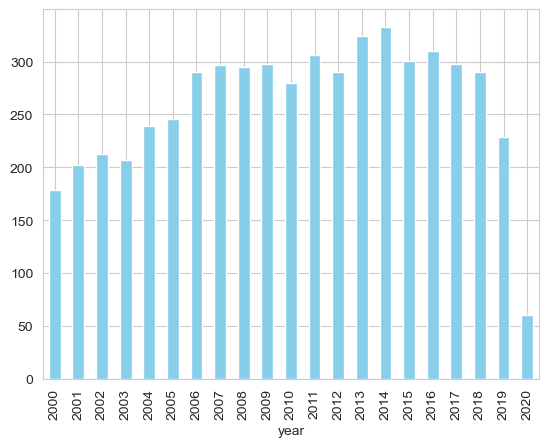

In [9]:
# Let's Start with basic question or insights i.e. Number of Movies Released each year.
movies_per_year = data.groupby('year').size() # Group by the 'year' column and count the number of movies per year
movies_per_year.plot(kind='bar', color='skyblue')

We can see the year 2020 has the lowest number of movies produced this is because our dataset is till 31st July 2020, hence its incomplete. 

#### Identify the most popular genres each year or over certain periods & Finding if there are genre trends.
#### Average Movie Duration by Genre and Year.

In [10]:
# Split and Explode the Genre Column- When genres are in a single cell separated by commas,
# it's difficult to count the number of times each genre appears individually. 

# Convert all values in the 'genre' column to strings because its in object 
data['genre'] = data['genre'].astype(str)

In [11]:
# Split the 'genre' column and explode it so each genre has its own row
data['genre'] = data['genre'].str.split(',')

In [12]:
# Explode: This function takes each element in the list and creates a new row for it, duplicating the other columns as needed.

In [13]:
data = data.explode('genre')

In [14]:
# Remove any leading/trailing whitespace in genres
data['genre'] = data['genre'].str.strip()

In [15]:
data.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language_1,language_2,...,actors_1,actors_f2,description,desc35,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,reviews_from_users
0,tt0035423,Kate & Leopold,Kate & Leopold,2001,01/03/2002,Comedy,118,USA,English,French,...,Meg Ryan,"Meg Ryan, Hugh Jackman",An English Duke from 1876 is inadvertedly drag...,An English Duke from 1876 is inadvertedly,6.4,77852,48000000,47121859.0,76019048,341.0
0,tt0035423,Kate & Leopold,Kate & Leopold,2001,01/03/2002,Fantasy,118,USA,English,French,...,Meg Ryan,"Meg Ryan, Hugh Jackman",An English Duke from 1876 is inadvertedly drag...,An English Duke from 1876 is inadvertedly,6.4,77852,48000000,47121859.0,76019048,341.0
0,tt0035423,Kate & Leopold,Kate & Leopold,2001,01/03/2002,Romance,118,USA,English,French,...,Meg Ryan,"Meg Ryan, Hugh Jackman",An English Duke from 1876 is inadvertedly drag...,An English Duke from 1876 is inadvertedly,6.4,77852,48000000,47121859.0,76019048,341.0
1,tt0118589,Glitter,Glitter,2001,30/11/2001,Drama,104,USA,English,NaN,...,Mariah Carey,"Mariah Carey, Max Beesley",A young singer dates a disc jockey who helps h...,A young singer dates a disc jockey,2.2,21298,22000000,4274407.0,5271666,319.0
1,tt0118589,Glitter,Glitter,2001,30/11/2001,Music,104,USA,English,NaN,...,Mariah Carey,"Mariah Carey, Max Beesley",A young singer dates a disc jockey who helps h...,A young singer dates a disc jockey,2.2,21298,22000000,4274407.0,5271666,319.0


In [16]:
# Calculate the Most Popular Genres Each Year

# Group by 'year' and 'genre' to count the number of movies per genre each year
genre_counts = data.groupby(['year', 'genre']).size().reset_index(name='count')

# Find the most popular genre per year
most_popular_genres = genre_counts.loc[genre_counts.groupby('year')['count'].idxmax()]

# Display the most popular genres by year
print(most_popular_genres)

     year  genre  count
6    2000  Drama     95
26   2001  Drama    111
46   2002  Drama    125
65   2003  Drama    107
85   2004  Drama    131
105  2005  Drama    148
125  2006  Drama    159
144  2007  Drama    170
164  2008  Drama    165
183  2009  Drama    157
203  2010  Drama    166
223  2011  Drama    176
242  2012  Drama    155
262  2013  Drama    191
281  2014  Drama    195
301  2015  Drama    192
321  2016  Drama    186
341  2017  Drama    179
361  2018  Drama    176
381  2019  Drama    128
399  2020  Drama     30


Dominance of Drama: These trends suggest that drama has been a staple genre with broad appeal across years.The number of drama movies released per year generally increases from 2000 to around 2014, where it peaks with 195 movies. This suggests a growing interest in the genre during this period.

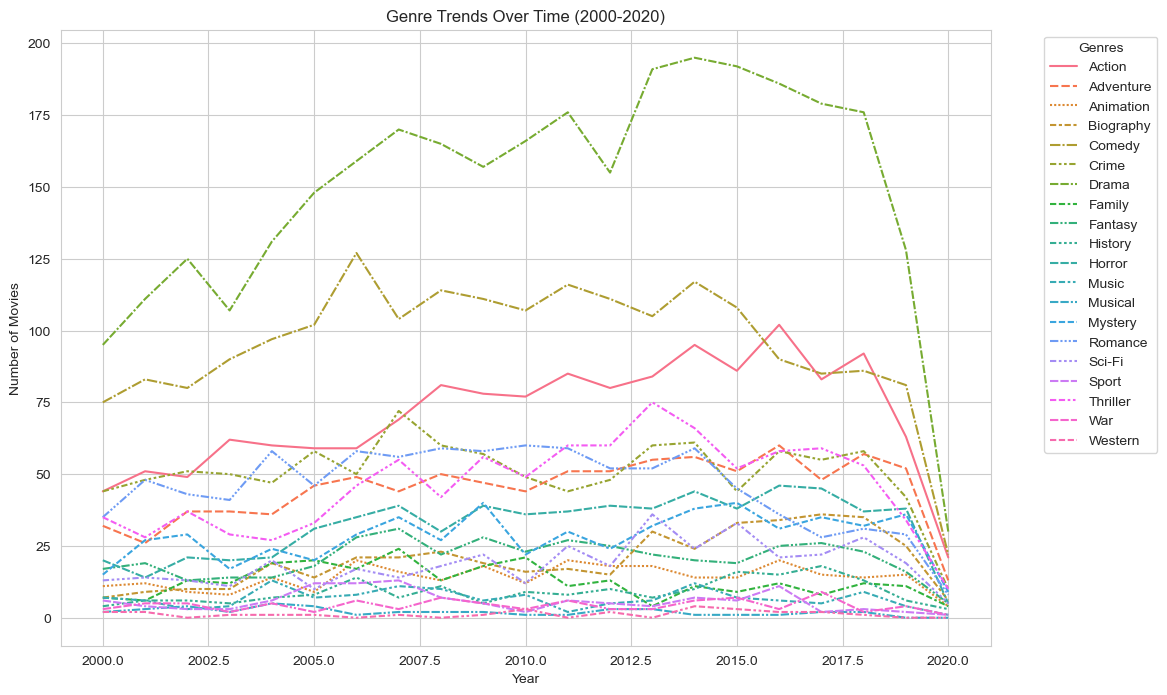

In [17]:
# Plot Genre Trends Over Time
# Pivot the data to create a matrix of years (rows) and genres (columns) with movie counts
genre_trends = genre_counts.pivot(index='year', columns='genre', values='count').fillna(0)

# Plot the genre trends
plt.figure(figsize=(12, 8))
sns.lineplot(data=genre_trends)
plt.title("Genre Trends Over Time (2000-2020)")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

1. The graph provides insight into changing audience preferences, with Drama dominating for a long time but facing a gradual decline. Action and Comedy remain strong but show some decline as well.
2. The impact of external factors like the COVID-19 pandemic is apparent, with a substantial drop in all genres in 2020.
3. After the mid-2010s, action movies also start to decline, though not as drastically as Drama. This suggests a slight shift in audience preference away from action in recent years.
4. Genres like Thriller, Horror, and Sci-Fi show a modest increase over time, particularly from 2010 onwards, though they never surpass the most popular genres like Drama or Action.

In [18]:
# Calculate Average Movie Duration by Genre and Year
average_duration = data.groupby(['year', 'genre'])['duration'].mean().reset_index()

# Display the average duration data
print(average_duration.head())


   year      genre    duration
0  2000     Action  113.818182
1  2000  Adventure  106.687500
2  2000  Animation   83.454545
3  2000  Biography  120.857143
4  2000     Comedy  102.080000


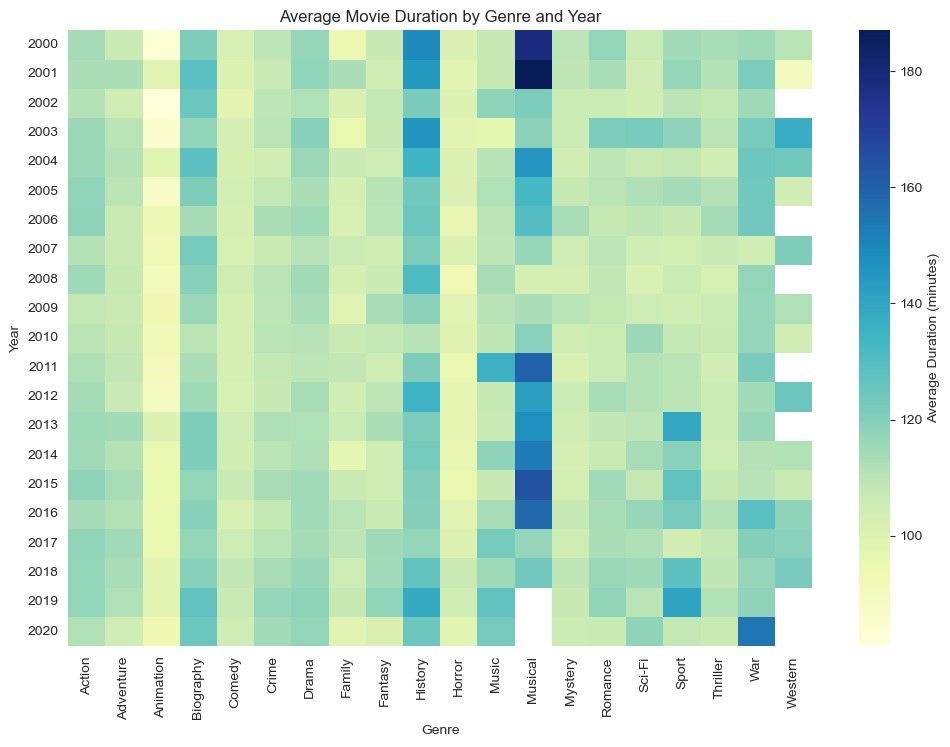

In [19]:
# Plot Average Movie Duration by Genre and Year
# Pivot the data to create a matrix for the heatmap
duration_trends = average_duration.pivot(index='year', columns='genre', values='duration')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(duration_trends, cmap="YlGnBu", cbar_kws={'label': 'Average Duration (minutes)'})
plt.title("Average Movie Duration by Genre and Year")
plt.xlabel("Genre")
plt.ylabel("Year")
plt.show()

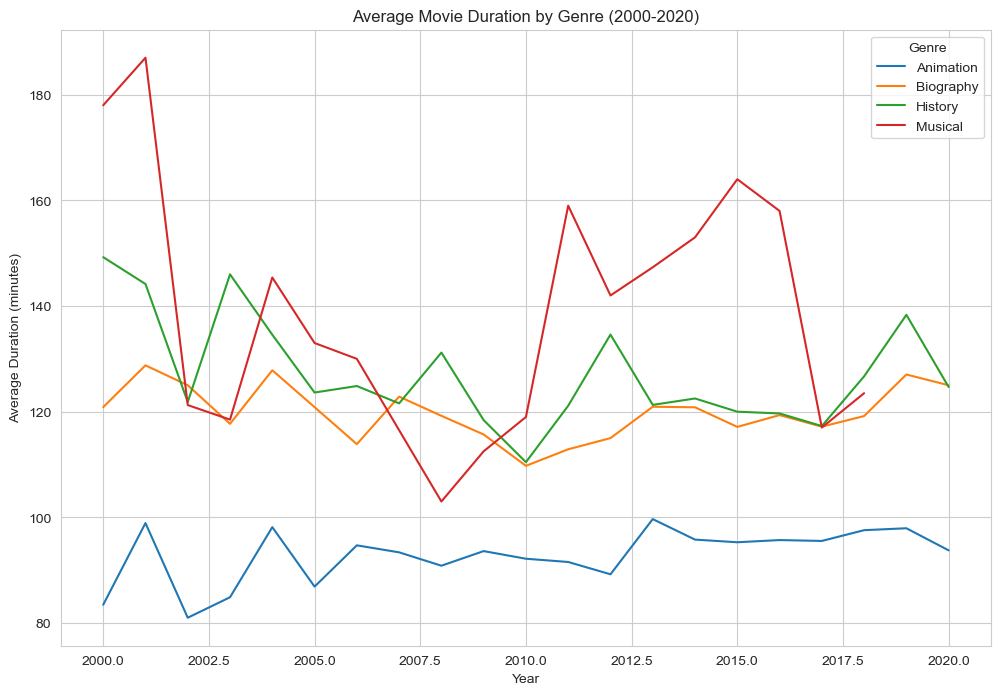

In [20]:
# Plot average duration for a few selected genres over time
selected_genres = ['Animation', 'Biography', 'History', 'Musical']  # Select genres of interest
plt.figure(figsize=(12, 8))
for genre in selected_genres:
    sns.lineplot(data=average_duration[average_duration['genre'] == genre], x='year', y='duration', label=genre)

plt.title("Average Movie Duration by Genre (2000-2020)")
plt.xlabel("Year")
plt.ylabel("Average Duration (minutes)")
plt.legend(title="Genre")
plt.show()


By calculating the average duration of movies in each genre we get the insights that
1. Short Duration-  Animation movies are shortest among the others but as year passed they are getting slightly longer.
2. Long Duration- Biography, History and Musical movies have the highest length.



In [53]:
# Identify top-rated movies each year

# Using a new data set because in previous we split the genre to get detailed analysis, which lead to duplicate the same movie.
new_data = pd.read_csv('IMDB Movies 2000 - 2020.csv')

# Find the top-rated movie for each year
# Group by 'year' and select the row with the highest rating for each year
top_rated_each_year = new_data.loc[data.groupby('year')['avg_vote'].idxmax()]

# Select only the desired columns
top_rated_each_year = top_rated_each_year[['year', 'original_title', 'avg_vote', 'genre','country']]

# Display the result
top_rated_each_year


,year,original_title,avg_vote,genre,country
478,2000,O Auto da Compadecida,8.6,"Comedy, Drama, Western",Brazil
9,2001,The Lord of the Rings: The Fellowship of the Ring,8.8,"Action, Adventure, Drama","New Zealand, USA"
85,2002,The Lord of the Rings: The Two Towers,8.7,"Action, Adventure, Drama","New Zealand, USA"
84,2003,The Lord of the Rings: The Return of the King,8.9,"Action, Adventure, Drama","New Zealand, USA"
1247,2004,Black Friday,8.5,"Action, Crime, Drama",India
1766,2005,Babam ve Oglum,8.3,"Drama, Family",Turkey
1298,2006,The Departed,8.5,"Crime, Drama, Thriller",USA
2301,2007,Taare Zameen Par,8.4,"Drama, Family",India
1725,2008,The Dark Knight,9.0,"Action, Crime, Drama","USA, UK"
2639,2009,3 Idiots,8.4,"Comedy, Drama",India


Looks like India produced some good movies from the past 20 years which got the highest rating among all the movies released that year. As an Indian this is a proud moment for me since we are good at making it.

In [54]:
# Analyze the most common languages used in movies over the years.

# Count the occurrences of each language in each year
language_counts = new_data.groupby(['year', 'language_1']).size().reset_index(name='count')

# Find the most popular language in each year
# For each year, find the language with the maximum count
most_popular_language_each_year = language_counts.loc[language_counts.groupby('year')['count'].idxmax()]

# Select the columns we are interested in for better readability
most_popular_language_each_year = most_popular_language_each_year[['year', 'language_1', 'count']]

# Since we have three column so we do this same step for all the language column.

In [55]:
most_popular_language_each_year

,year,language_1,count
2,2000,English,149
18,2001,English,162
31,2002,English,184
46,2003,English,165
64,2004,English,183
83,2005,English,202
107,2006,English,236
125,2007,English,244
147,2008,English,236
163,2009,English,245


By looking at the output we can say that english is the most common language used in movies.
I have also tried to get the 2nd most common language from SQL because its easy and here is the output i.e. Hindi is the 2nd most common language.
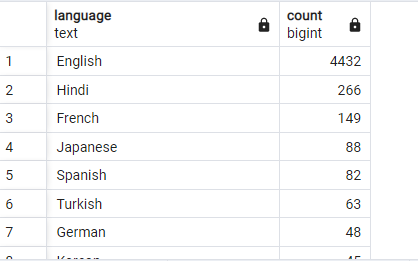

In [56]:
# Analyze the 2nd language column 
language_count = new_data.groupby(['year', 'language_2']).size().reset_index(name='count')

most_popular_language_each = language_count.loc[language_count.groupby('year')['count'].idxmax()]

most_popular_language_each = most_popular_language_each[['year', 'language_2', 'count']]

# Display the result
most_popular_language_each


,year,language_2,count
18,2000,Spanish,14
29,2001,French,15
53,2002,French,15
90,2003,French,14
121,2004,French,16
174,2005,Spanish,24
209,2006,Spanish,24
241,2007,Spanish,20
279,2008,Spanish,23
296,2009,French,21


Here we can see that Spanish and French language are the most common secondary languages.

So by looking at the output from both the columns we can conclude that although English is the most popular language, French and Spanish also gained popularity in certain periods.

In [57]:
# Directors with Consistently High Ratings: For this analysis I have used SQL because its easy. 

In [58]:
# Calculate Average Rating by Director: Use the AVG aggregate function to find the average rating for each director.
# Filter for High Ratings: Use a HAVING clause to filter directors who have an average rating above a certain threshold.

SELECT
    director,
    AVG(avg_vote) AS avg_rating,
	COUNT(title) AS total_movies
FROM 
    movies
GROUP BY 
    director
HAVING 
    AVG(avg_vote) >= 8
ORDER BY 
    total_movies DESC;
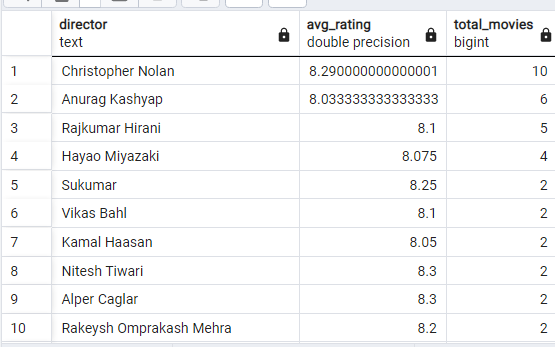

So here we can see that two directors who produce some of the best movies in this decade are on top of the list.
Christopher Nolan directed movies like "Interstellar", "Inception", and "Tenet" are highly rated.

Anurag Kashyap: Acclaimed Indian Director

Known for bold narratives and social commentary, Kashyap's notable works include:

- Gangs of Wasseypur
- Dev.D
- Black Friday

Recipient of National Film Award and Filmfare Award. Pioneering Indian new wave cinema.

**Top 10 Actors in Terms of Total Votes**

In [62]:
# Split the actors column because each row has many actors.
new_data['actors'] = new_data['actors'].astype(str)
new_data['actors'] = new_data['actors'].str.split(', ')
new_data_exploded = new_data.explode('actors')

# Group by actor and calculate average rating, total votes, and movie count
top_actors = (
    new_data_exploded.groupby('actors')
    .agg(avg_rating=('avg_vote', 'mean'), total_votes=('votes', 'sum'), total_movies=('avg_vote', 'count'))
    .reset_index()
)

# Sort by average total votes. Later we can use rating or movie count
top_actors = top_actors.sort_values(by=['total_votes'], ascending=[False])

top_actors.head(10)


,actors,avg_rating,total_votes,total_movies
27678,'Michael Caine',7.034783,12211406,23
35376,'Samuel L. Jackson',6.492500,11733725,40
28974,'Morgan Freeman',6.742857,11007926,35
35826,'Scarlett Johansson',7.114706,10501513,34
43893,['Leonardo DiCaprio',7.746154,9156976,13
26267,'Mark Ruffalo',7.060714,8968473,28
31329,'Paul Bettany',7.104545,8610220,22
30766,'Orlando Bloom',7.221429,8111612,14
13992,'Gary Oldman',6.880952,8029652,21
6868,'Cate Blanchett',6.975000,8009576,24


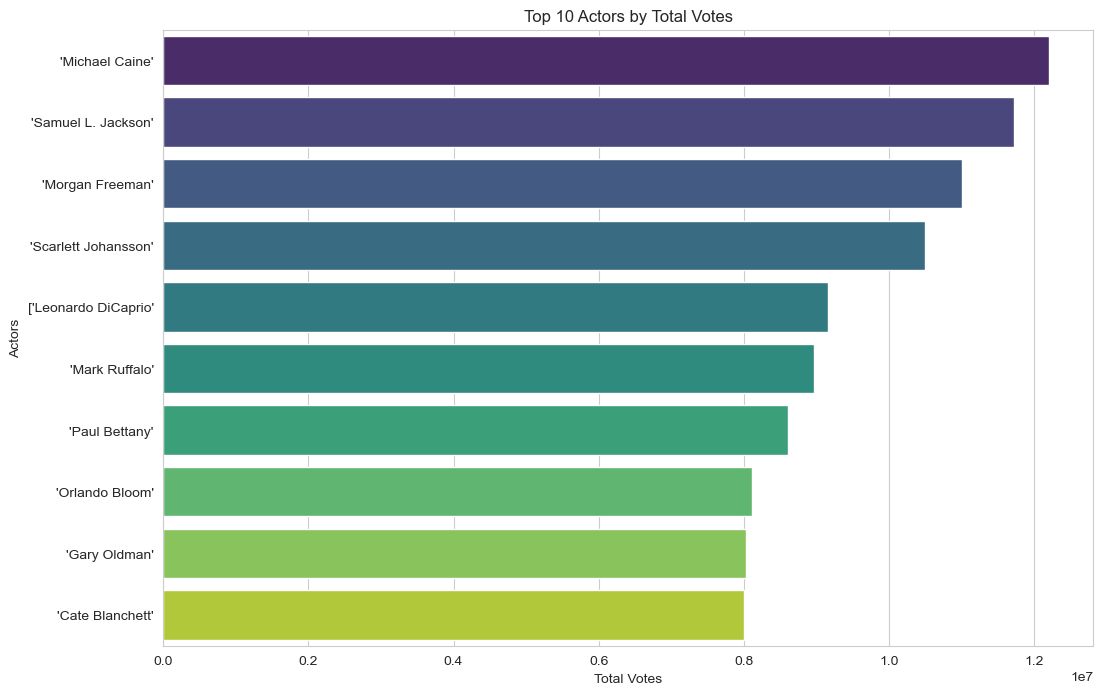

In [67]:
# Getting the top 10 actors
top_actors_sorted = top_actors.sort_values(by='total_votes', ascending=False).head(10)
# Plotting 
plt.figure(figsize=(12, 8))
sns.barplot(x='total_votes', y='actors', data=top_actors_sorted, palette='viridis')
plt.xlabel("Total Votes")
plt.ylabel("Actors")
plt.title("Top 10 Actors by Total Votes")
plt.show()

Here is the list and graph of the best actors in Film Industry and I don't need to tell you about them since they are already people's favourites.

 **Actors who appear frequently in high-rated movies or movies with a high number of votes.** 

In [68]:
# Define thresholds for high rating and high votes
high_rating_threshold = 8.0
high_votes_threshold = 50000

# Find actors with an average rating above the high rating threshold
high_rating_actors = top_actors[top_actors['avg_rating'] >= high_rating_threshold]

# Find actors with a total number of votes above the high votes threshold
high_votes_actors = top_actors[top_actors['total_votes'] >= high_votes_threshold]

# Find actors who meet both criteria (high-rated movies and high votes)
high_rating_and_votes_actors = top_actors[
    (top_actors['avg_rating'] >= high_rating_threshold) &
    (top_actors['total_votes'] >= high_votes_threshold)
]

# Display the actors who meet both criteria
print("Actors frequently appearing in high-rated and high-vote movies:")
print(high_rating_and_votes_actors[['actors', 'avg_rating', 'total_votes', 'total_movies']])



Actors frequently appearing in high-rated and high-vote movies:
                        actors  avg_rating  total_votes  total_movies
19908      'John Ratzenberger'    8.000000      4403499             6
19637              'John Bach'    8.800000      3054058             2
38905           'Teddy Newton'    8.133333      2242255             3
3372   'Anthony Michael Hall']    9.000000      2241615             1
34370               'Ron Dean'    9.000000      2241615             1
...                        ...         ...          ...           ...
28328        'Mikaal Zulfiqar'    8.000000        51757             1
29213          'Nabeel Ahmed']    8.000000        51757             1
15544            'Hasan Noman'    8.000000        51757             1
33003            'Rasheed Naz'    8.000000        51757             1
22384         'Kerem Sarikaya'    8.000000        51757             1

[1013 rows x 4 columns]


In [74]:
# Sorting & Plotting graph for the top 10 actors in high rated and voted movies

In [71]:
high= high_rating_and_votes_actors.sort_values(by='total_votes', ascending=False).head(10)

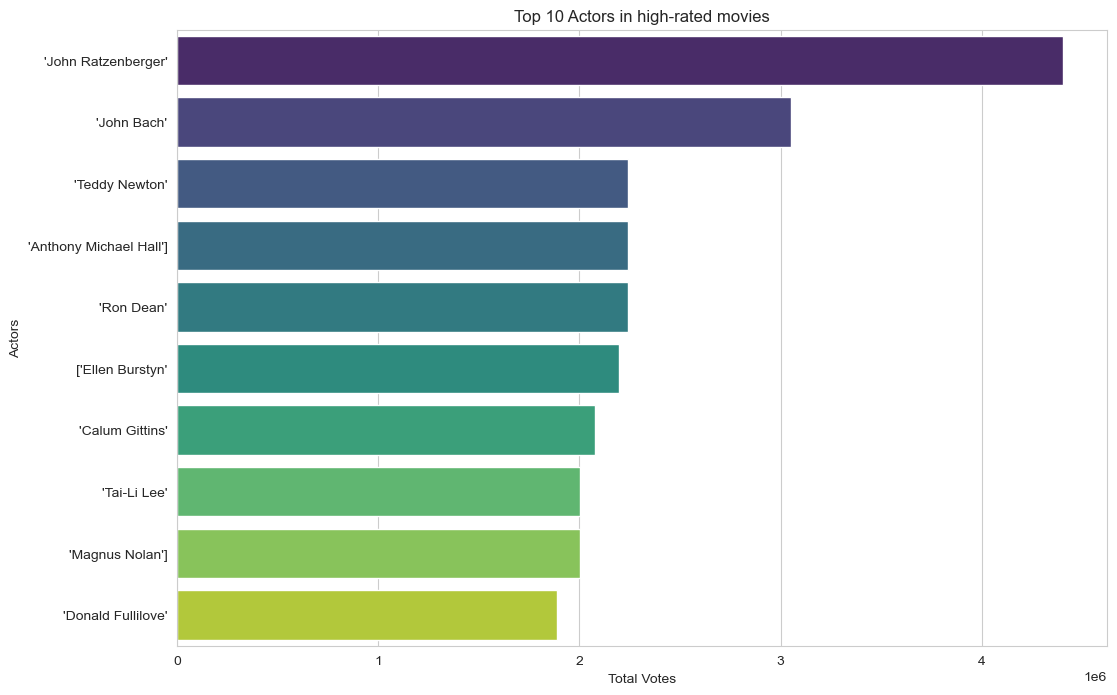

In [75]:
plt.figure(figsize=(12, 8))
sns.barplot(x='total_votes', y='actors', data=high, palette='viridis')
plt.xlabel("Total Votes")
plt.ylabel("Actors")
plt.title("Top 10 Actors in high-rated movies")
plt.show()

John Ratzenberger: The only person to voice a character in all of Pixar Animation's feature films.

John Bach: His screen career spans more than 90 roles. John Bach was born on 5 June 1946 in Wales, UK. He is an actor, known for The Lord of the Rings.

This actors worked in several movies and many of them get the highest rating.

***Plot the average IMDb rating and number of votes each year to see if audience engagement has changed.***

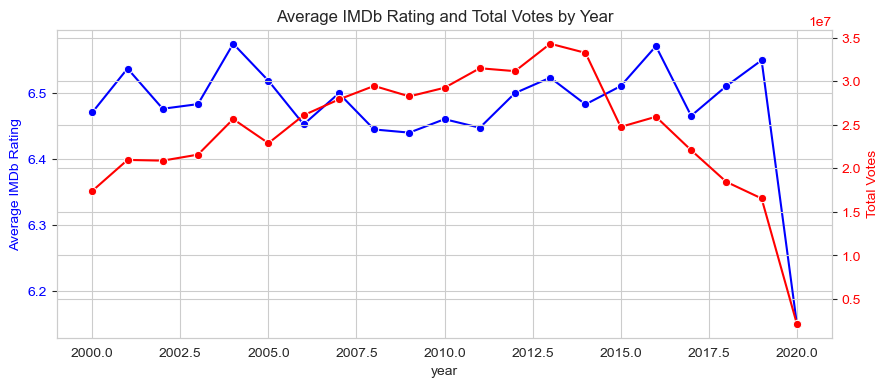

In [79]:
# Assuming 'year', 'avg_vote' (IMDb rating), and 'votes' columns are in your DataFrame
# Group by year to calculate the average IMDb rating and total votes each year
yearly_stats = new_data.groupby('year').agg(avg_rating=('avg_vote', 'mean'), total_votes=('votes', 'sum')).reset_index()

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 4))

# Plot average IMDb rating on the primary y-axis
sns.lineplot(data=yearly_stats, x='year', y='avg_rating', marker='o', color='b', ax=ax1)
ax1.set_ylabel('Average IMDb Rating', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_title('Average IMDb Rating and Total Votes by Year')

# Create a second y-axis for total votes
ax2 = ax1.twinx()
sns.lineplot(data=yearly_stats, x='year', y='total_votes', marker='o', color='r', ax=ax2)
ax2.set_ylabel('Total Votes', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Show the plot
plt.show()


The average IMDb rating appears to stay relatively stable over the years, with slight fluctuations. Most years maintain an average rating between 6.3 and 6.6.

The total votes exhibit an upward trend until around 2017, with a general increase in audience engagement. This trend suggests that more people started voting on IMDb over time, likely due to increased popularity of the platform and internet accessibility.

**Determine if there’s a correlation between a movie's duration and its IMDb rating.**

Correlation between duration and IMDb rating: 0.38
P-value: 0.00


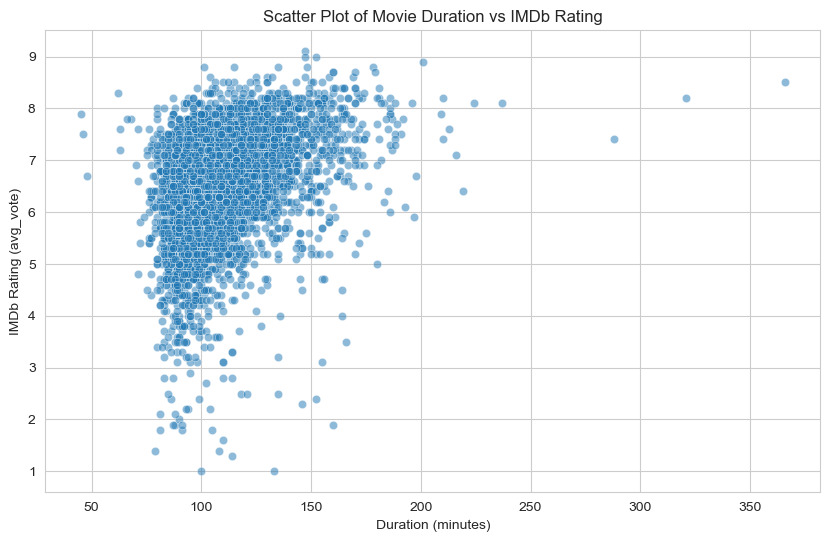

In [85]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient
correlation, p_value = pearsonr(new_data['duration'], new_data['avg_vote'])
print(f"Correlation between duration and IMDb rating: {correlation:.2f}")
print(f"P-value: {p_value:.2f}")

# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=new_data, x='duration', y='avg_vote', alpha=0.5)
plt.title("Scatter Plot of Movie Duration vs IMDb Rating")
plt.xlabel("Duration (minutes)")
plt.ylabel("IMDb Rating (avg_vote)")
plt.show()

The moderate positive correlation (0.38) and significant p-value (0.00) imply that there is a statistically significant, albeit not very strong, relationship between movie duration and IMDb rating.

The plot shows a large concentration of movies with a duration of around 100 minutes. This suggests that most movies in the dataset fall within this duration range.

There appears to be a slight upward trend in the scatter, meaning that **movies with a longer duration (above 100 minutes) tend to have slightly higher ratings on average.** This aligns with the moderate positive correlation coefficient (0.38) we observed earlier, indicating a tendency for longer movies to have higher ratings.

For movies with durations above 150 minutes, there is a visible concentration of movies with IMDb ratings mostly above 6. **This suggests that longer movies are more likely to receive higher ratings.**

In [86]:
# Assuming `new_data` is your dataframe and columns are 'avg_vote' and 'votes'
# Calculate the IQR for both ratings and votes
q1_rating, q3_rating = new_data['avg_vote'].quantile(0.25), new_data['avg_vote'].quantile(0.75)
iqr_rating = q3_rating - q1_rating
q1_votes, q3_votes = new_data['votes'].quantile(0.25), new_data['votes'].quantile(0.75)
iqr_votes = q3_votes - q1_votes

# Define lower and upper bounds for outliers
lower_bound_rating = q1_rating - 1.5 * iqr_rating
upper_bound_rating = q3_rating + 1.5 * iqr_rating
lower_bound_votes = q1_votes - 1.5 * iqr_votes
upper_bound_votes = q3_votes + 1.5 * iqr_votes

# Filter movies with unusually high or low ratings or votes
unusual_movies = new_data[
    (new_data['avg_vote'] < lower_bound_rating) | 
    (new_data['avg_vote'] > upper_bound_rating) |
    (new_data['votes'] < lower_bound_votes) |
    (new_data['votes'] > upper_bound_votes)
]

print(unusual_movies[['title', 'avg_vote', 'votes']])


                                                  title  avg_vote    votes
1                                               Glitter       2.2    21298
6                                        I Fantastici 4       5.7   307944
9     Il Signore degli Anelli - La compagnia dell'An...       8.8  1619920
11                               Mission: Impossible II       6.1   308586
12                                        Resident Evil       6.7   243241
...                                                 ...       ...      ...
5362                            Storia di un matrimonio       8.0   227338
5379                                         Marighella       3.1    42692
5382                                            Sadak 2       1.0    53162
5440                                               1917       8.3   362897
5457                      Cena con delitto - Knives Out       7.9   377903

[678 rows x 3 columns]


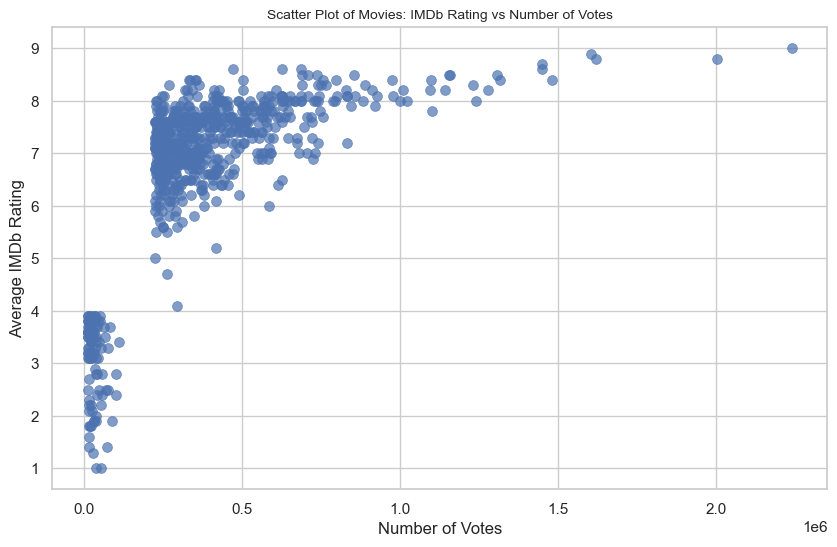

In [91]:
# Set the plot style
sns.set(style="whitegrid")

# Initialize the matplotlib figure
plt.figure(figsize=(10, 6))

# Scatter plot of votes vs avg_vote
sns.scatterplot(data=unusual_movies, x='votes', y='avg_vote', alpha=0.7, s=50, edgecolor=None)

# Set title and labels
plt.title("Scatter Plot of Movies: IMDb Rating vs Number of Votes", fontsize=10)
plt.xlabel("Number of Votes", fontsize=12)
plt.ylabel("Average IMDb Rating", fontsize=12)

# Display the plot
plt.show()
